## Bank Marketing Analysis

### importing libraries and mounting drive

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bank = pd.read_csv("/content/drive/MyDrive/tesina_MML/bank-additional-full.csv", sep=";")

### Info dataset

In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
 #no null values
 bank.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [ ]:
total_unknown_values = len(bank[(bank["job"]=="unknown")])+len(bank[(bank["marital"]=="unknown")])+len(bank[(bank["education"]=="unknown")])+\
                      len(bank[(bank["default"]=="unknown")])+len(bank[(bank["housing"]=="unknown")])+len(bank[(bank["loan"]=="unknown")])
print("there are "+str(total_unknown_values)+" unknown values in all the dataframe")

there are 12718 unknown values in all the dataframe


In [ ]:
#categorical/numerical variable
categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"]

for i in range(len(categorical)):
  print(categorical[i],":", bank[categorical[i]].unique(),"\n")

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

marital : ['married' 'single' 'divorced' 'unknown'] 

education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

default : ['no' 'unknown' 'yes'] 

housing : ['no' 'yes' 'unknown'] 

loan : ['no' 'yes' 'unknown'] 

contact : ['telephone' 'cellular'] 

month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri'] 

poutcome : ['nonexistent' 'failure' 'success'] 



### Data visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [ ]:
bank_yes = bank[bank["y"]=="yes"]
bank_no = bank[bank["y"]=="no"]

In [ ]:
print((bank["y"]=="yes").sum())
print((bank["y"]=="no").sum())

4640
36548


In [ ]:
4640+36548

41188

In [ ]:
36548/41188

0.8873458288821987

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


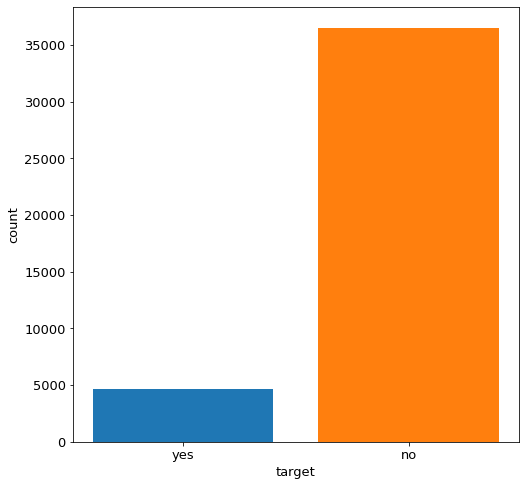

In [ ]:
#balanced dataset? 
plt.figure(figsize=(8,8))
plt.xlabel("target")
plt.ylabel("count")
target_bar = plt.bar(["yes","no"],[len(bank_yes), len(bank_no)], color=["tab:blue", "tab:orange"])
plt.savefig("balance.pdf",dpi=1200)
#dataset very unbalanced, need oversampling/undersampling

#### Categorical variable

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


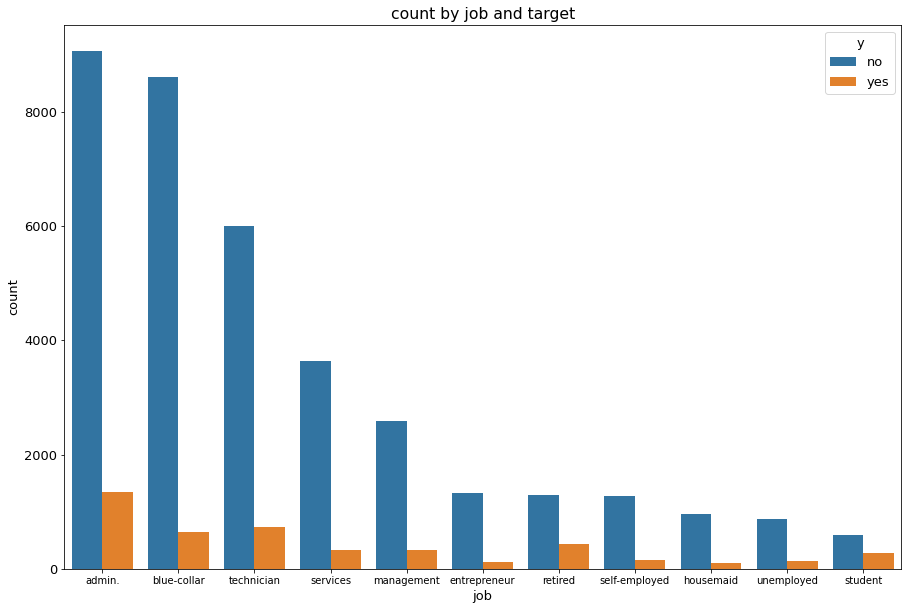

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="job", hue="y", data=bank, order=["admin.", "blue-collar","technician","services","management","entrepreneur",\
                    "retired","self-employed","housemaid","unemployed","student"])
plt.xticks(fontsize=10)
plt.title("count by job and target")
plt.savefig("job.pdf", dpi=1200)


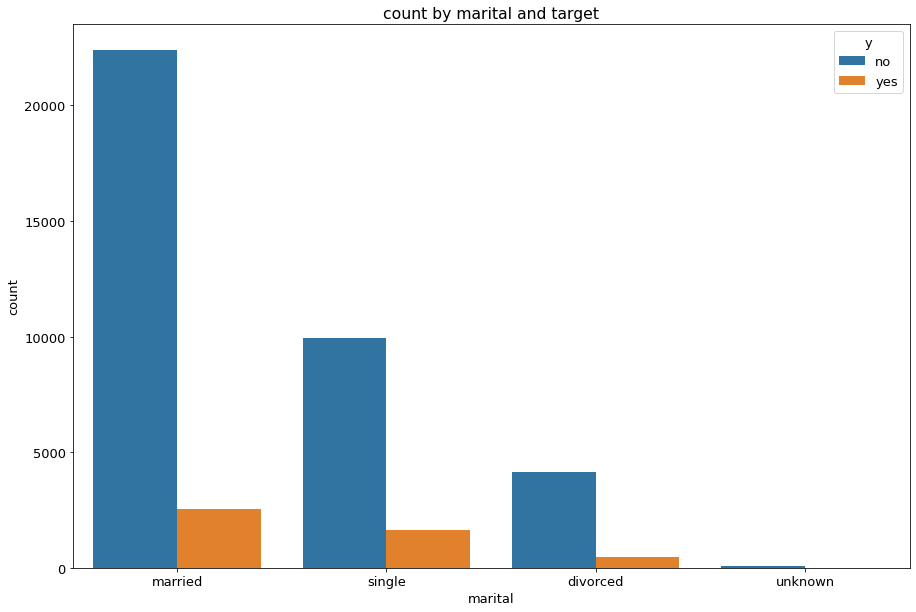

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="marital", hue="y", data=bank)
plt.title("count by marital and target")
plt.savefig("marital.pdf", dpi=1200)

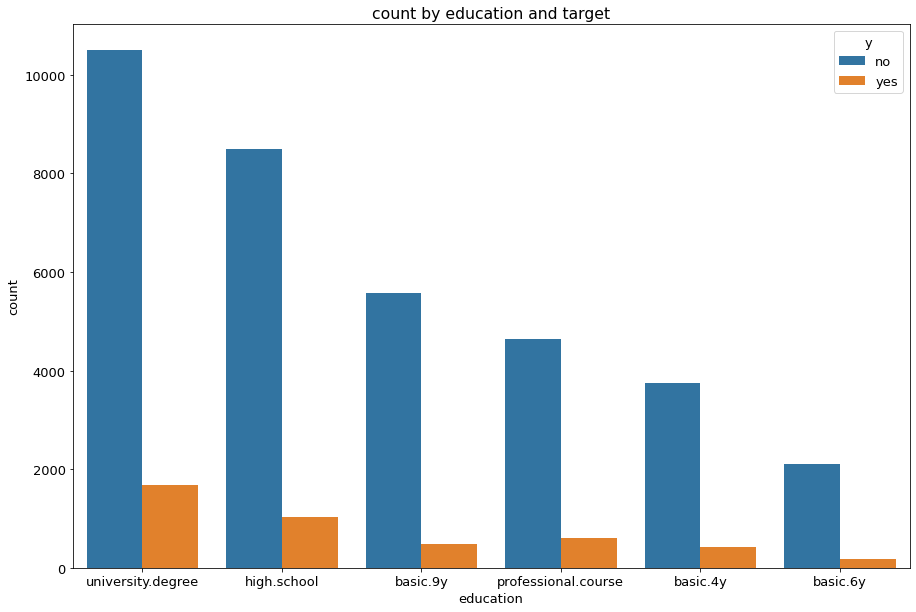

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="education", hue="y", data=bank, order=["university.degree","high.school", "basic.9y", "professional.course",\
                              "basic.4y", "basic.6y"])
plt.title("count by education and target")
plt.savefig("education.pdf", dpi=1200)
plt.show()

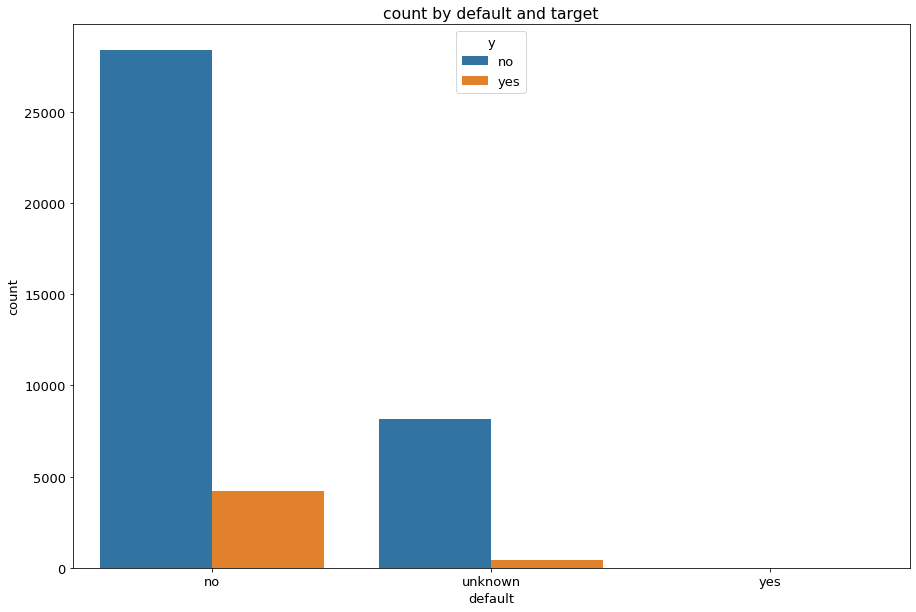

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="default", hue="y", data=bank)
plt.title("count by default and target")
plt.savefig("default.pdf", dpi=1200)
plt.show()

In [ ]:
defaultYes = (bank["default"]=="no").sum()
print("number of default=yes in the dataset is: ", defaultYes)
defaultYes/len(bank.index)

number of default=yes in the dataset is:  32588


0.7912013207730407

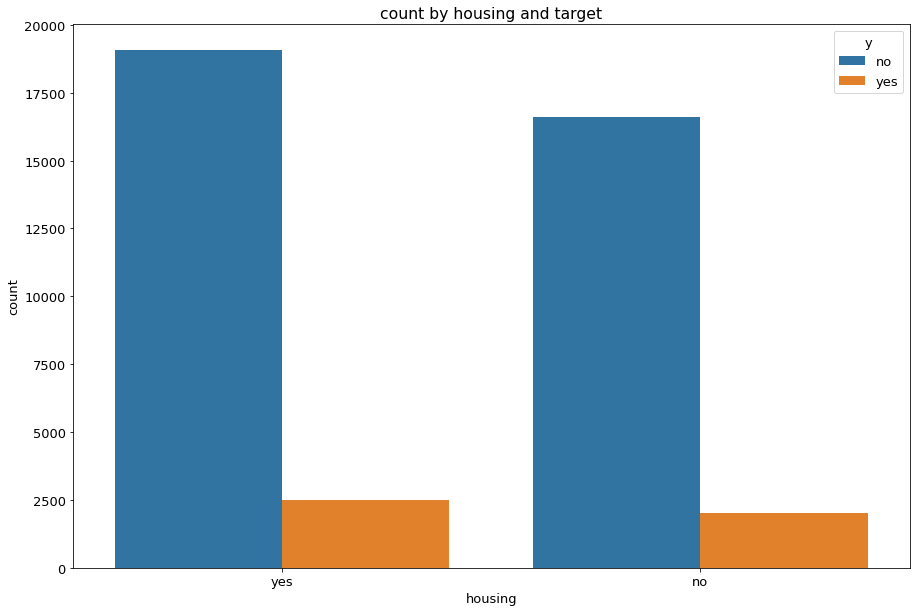

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="housing", hue="y", data=bank, order=["yes","no"])
plt.title("count by housing and target")
plt.savefig("housing.pdf", dpi=1200)
plt.show()

In [ ]:
pd.crosstab(bank["housing"], bank["y"], normalize="columns")

y,no,yes
housing,,
no,0.454088,0.436638
unknown,0.024160,0.023060
yes,0.521752,0.540302


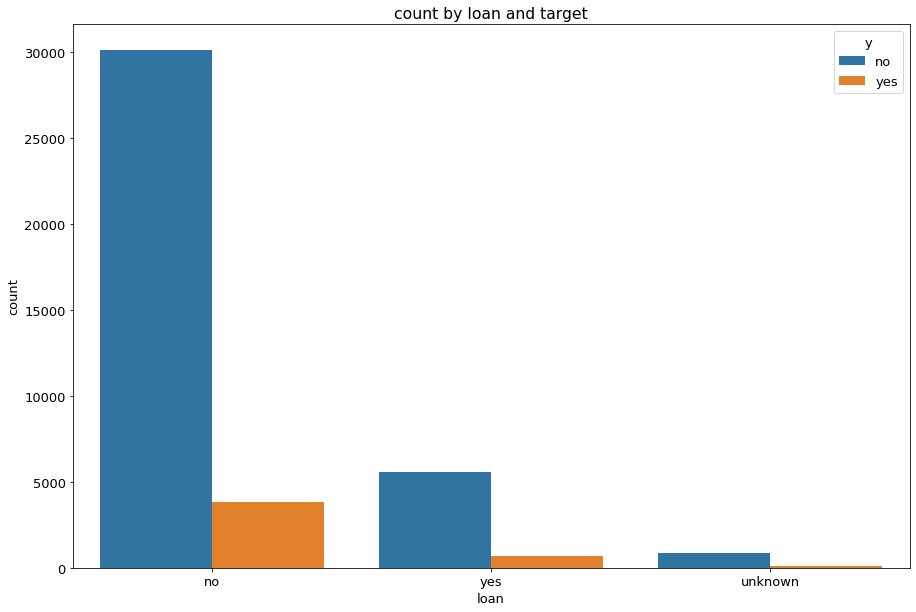

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan", hue="y", data=bank)
plt.title("count by loan and target")
plt.savefig("loan.pdf", dpi=1200)
plt.show()

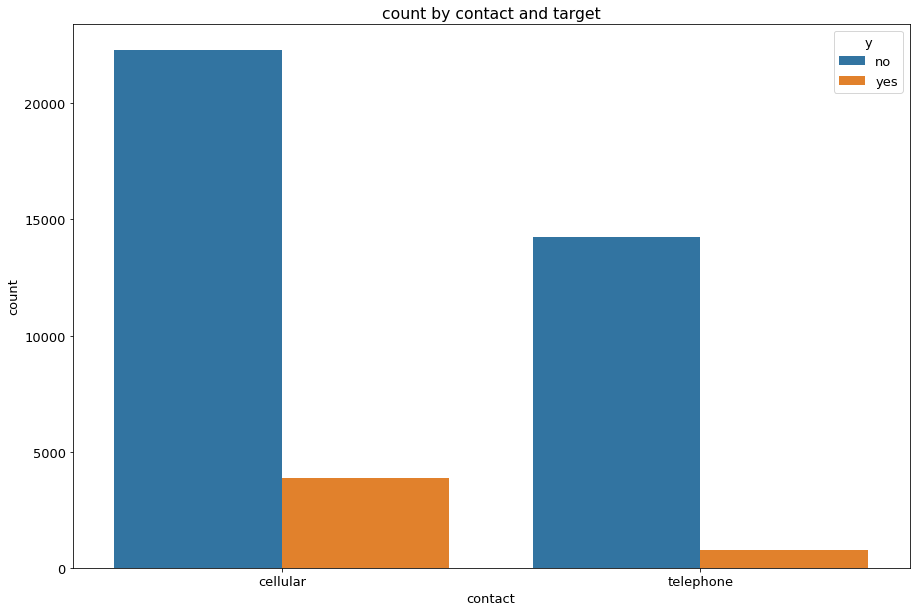

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="contact", hue="y", data=bank, order=["cellular", "telephone"])
plt.title("count by contact and target")
plt.savefig("contact.pdf", dpi=1200)
plt.show()

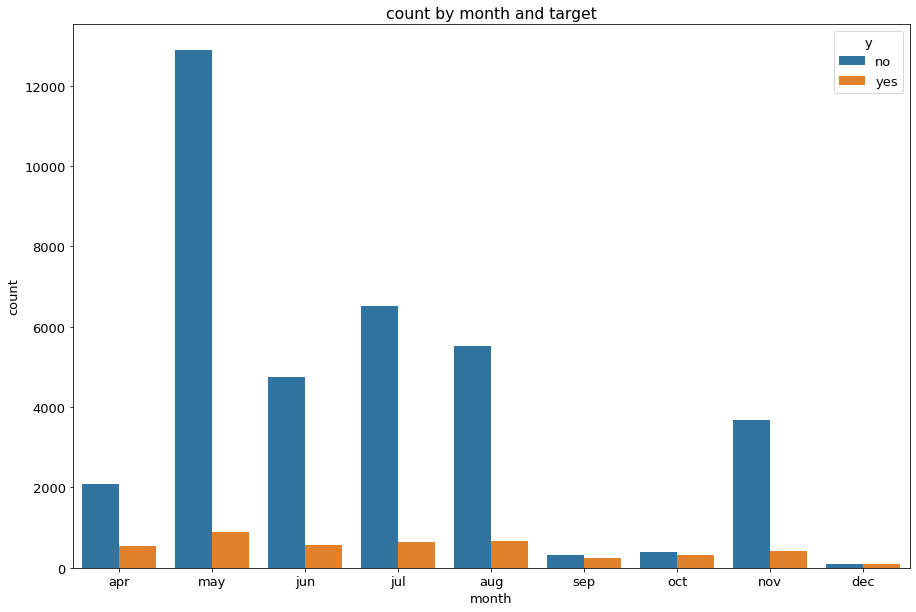

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="month", hue="y", data=bank, order=["apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.title("count by month and target")
plt.savefig("month.pdf", dpi=1200)
plt.show()

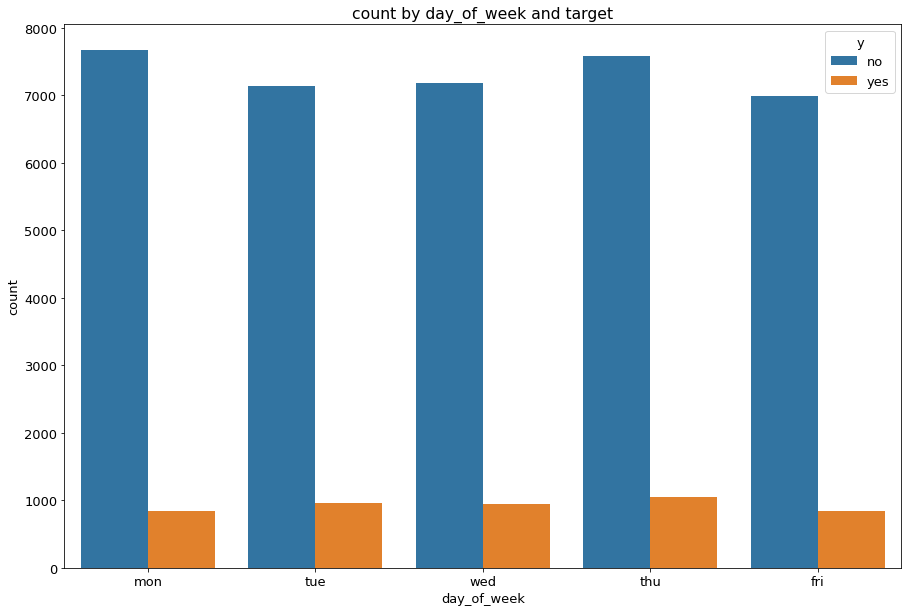

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="day_of_week", hue="y", data=bank)
plt.title("count by day_of_week and target")
plt.savefig("week.pdf", dpi=1200)
plt.show()

In [ ]:
pd.crosstab(bank["day_of_week"], bank["y"], normalize="columns")

y,no,yes
day_of_week,,
fri,0.191009,0.182328
mon,0.209779,0.182543
thu,0.207344,0.225216
tue,0.195277,0.205388
wed,0.196591,0.204526


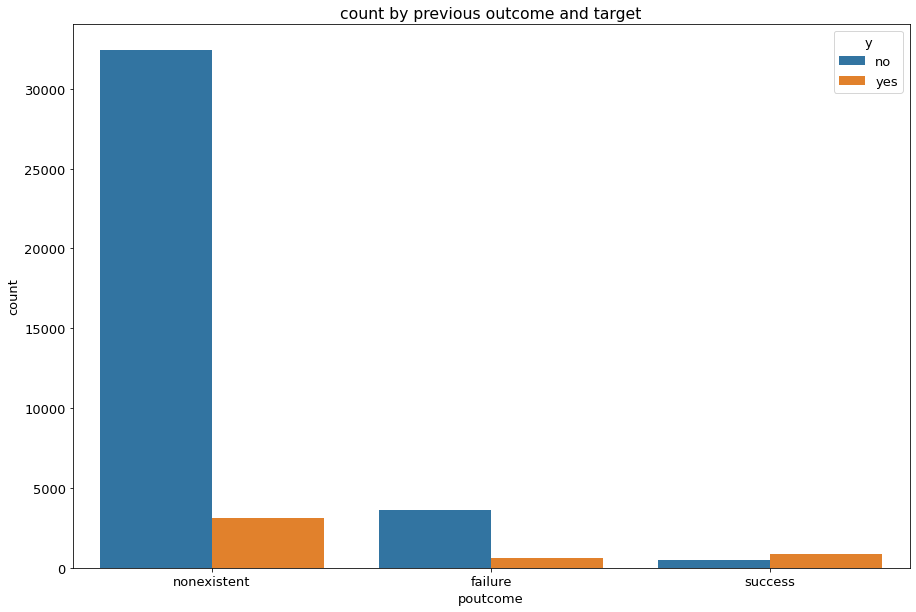

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="poutcome", hue="y", data=bank)
plt.title("count by previous outcome and target")
plt.savefig("poutcome.pdf", dpi=1200)
plt.show()

#### Numerical variable



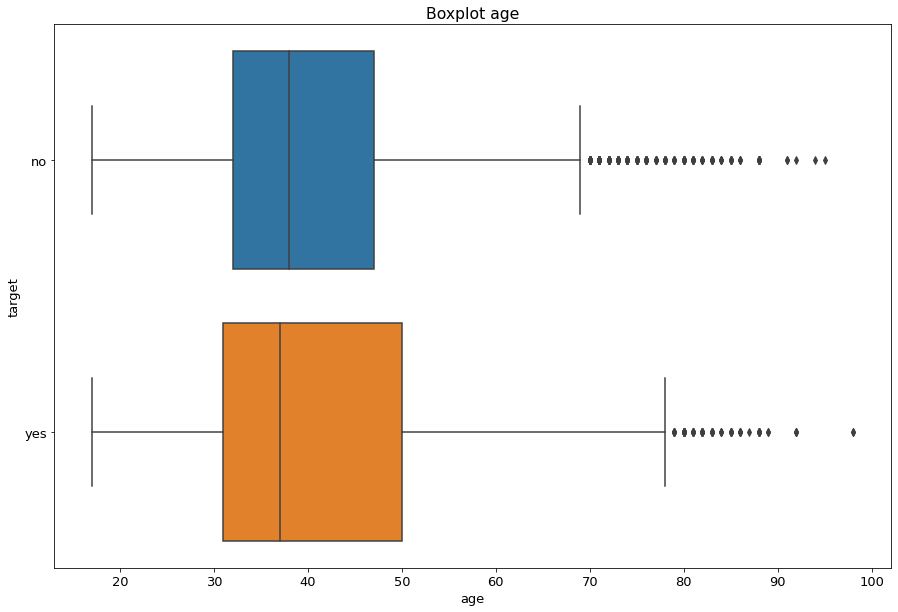

In [ ]:
#boxplot age
f, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="age", y="y", data=bank)
plt.xlabel("age")
plt.ylabel("target")
plt.title("Boxplot age")
plt.savefig("box_age.pdf", dpi=1200)

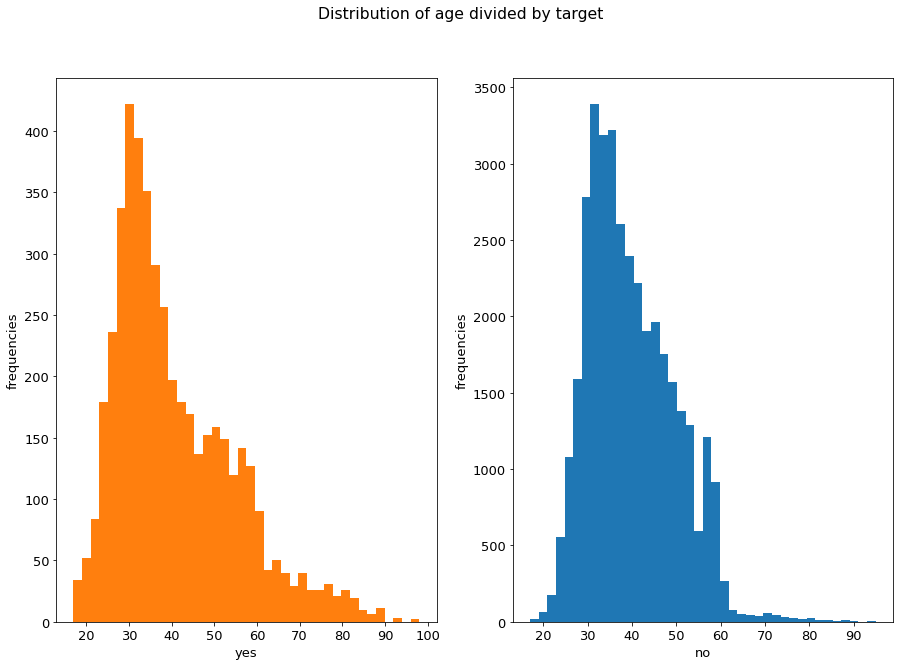

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.hist(bank[bank["y"]=="yes"]["age"], bins=40, color="tab:orange")
ax2.hist(bank[bank["y"]=="no"]["age"], bins=40, color="tab:blue")
ax1.set_xlabel("yes")
ax2.set_xlabel("no")
ax1.set_ylabel("frequencies")
ax2.set_ylabel("frequencies")
plt.suptitle("Distribution of age divided by target")
plt.savefig("distr_age.pdf", dpi=1200)
plt.show()

In [ ]:
plt.figure(figsize=(20,12))
sns.distplot(bank["age"])

In [ ]:
# Quartiles of age  with target "yes"
print('1º Quartile: ', (bank[bank['y']=="yes"])["age"].quantile(q = 0.25))
print('2º Quartile: ', bank[bank['y']=="yes"]["age"].quantile(q = 0.50))
print('3º Quartile: ', bank[bank['y']=="yes"]["age"].quantile(q = 0.75))
print('4º Quartile: ', bank[bank['y']=="yes"]["age"].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

upperBoundOutliersYes = bank[bank['y']=="yes"]["age"].quantile(q = 0.75) + 1.5*(bank[bank['y']=="yes"]["age"].quantile(q = 0.75) - bank[bank['y']=="yes"]["age"].quantile(q = 0.25))
lowerBoundOutiliersYes = bank[bank['y']=="yes"]["age"].quantile(q = 0.25) - 1.5*(bank[bank['y']=="yes"]["age"].quantile(q = 0.75) - bank[bank['y']=="yes"]["age"].quantile(q = 0.25))
    
print('Ages above for yes: ', upperBoundOutliersYes, 'are outliers')
print('Ages below for yes: ', lowerBoundOutiliersYes, 'are outliers')


# Quartiles of age  with target "yes"
print('1º Quartile: ', (bank[bank['y']=="no"])["age"].quantile(q = 0.25))
print('2º Quartile: ', bank[bank['y']=="no"]["age"].quantile(q = 0.50))
print('3º Quartile: ', bank[bank['y']=="no"]["age"].quantile(q = 0.75))
print('4º Quartile: ', bank[bank['y']=="no"]["age"].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

upperBoundOutliersNo = bank[bank['y']=="no"]["age"].quantile(q = 0.75) + 1.5*(bank[bank['y']=="no"]["age"].quantile(q = 0.75) - bank[bank['y']=="no"]["age"].quantile(q = 0.25))
lowerBoundOutiliersNo = bank[bank['y']=="no"]["age"].quantile(q = 0.25) - 1.5*(bank[bank['y']=="no"]["age"].quantile(q = 0.75) - bank[bank['y']=="no"]["age"].quantile(q = 0.25))
    
print('Ages above for no: ', upperBoundOutliersNo, 'are outliers')
print('Ages below for no: ', lowerBoundOutiliersNo, 'are outliers')

1º Quartile:  31.0
2º Quartile:  37.0
3º Quartile:  50.0
4º Quartile:  98.0
Ages above for yes:  78.5 are outliers
Ages below for yes:  2.5 are outliers
1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  95.0
Ages above for no:  69.5 are outliers
Ages below for no:  9.5 are outliers


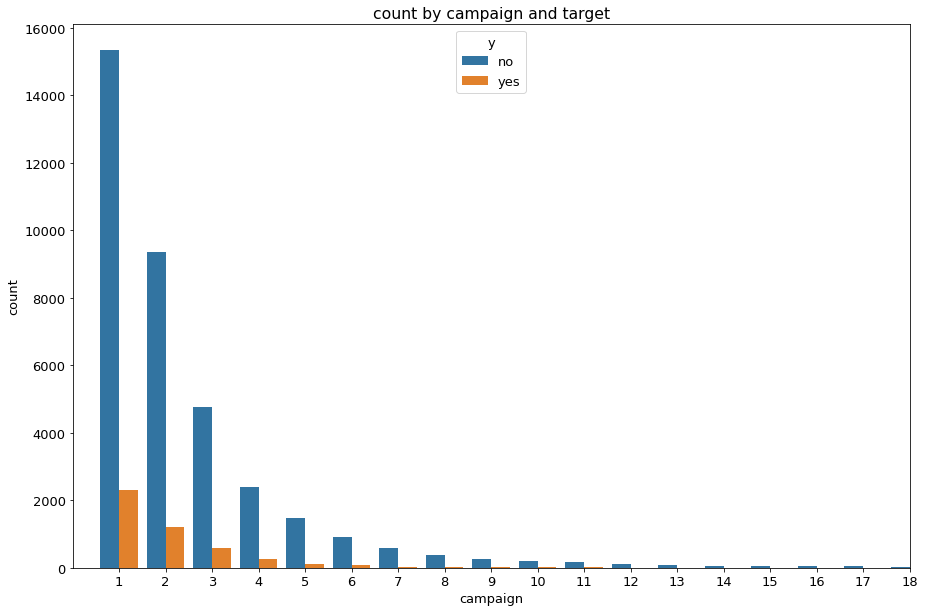

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x="campaign", hue="y", data=bank)
plt.title("count by campaign and target")
plt.xlim(-1, 17)
plt.savefig("campaign.pdf", dpi=1200)
plt.show()

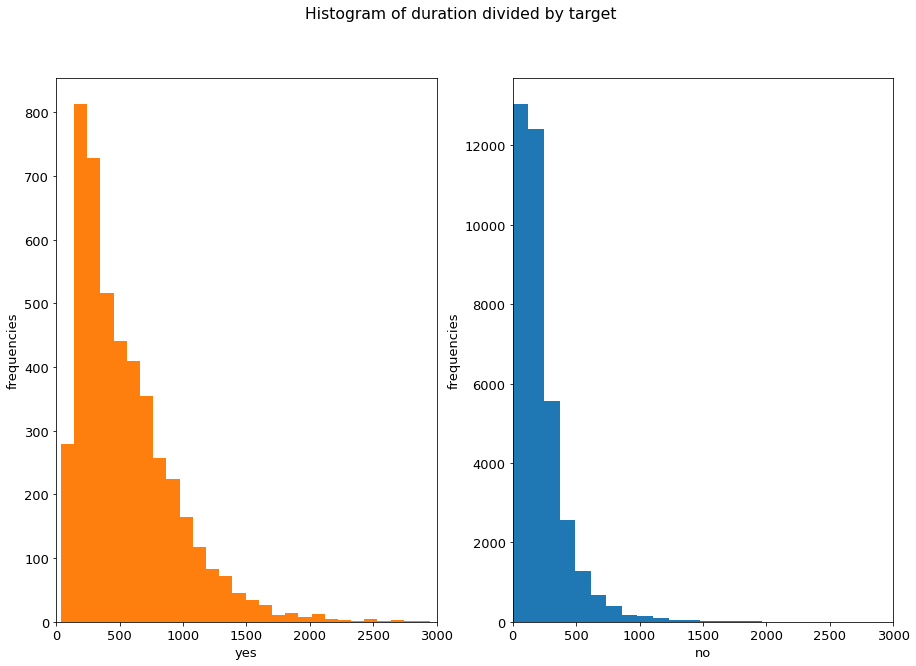

In [ ]:
#duration
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
ax1.hist(bank[bank["y"]=="yes"]["duration"], bins=40, color="tab:orange")
ax2.hist(bank[bank["y"]=="no"]["duration"], bins=40, color="tab:blue")
ax1.set_xlabel("yes")
ax2.set_xlabel("no")
ax1.set_ylabel("frequencies")
ax2.set_ylabel("frequencies")
ax1.set_xlim(-1, 3000)
ax2.set_xlim(-1, 3000)
plt.suptitle("Histogram of duration divided by target")
plt.savefig("duration.pdf", dpi=1200)
plt.show()

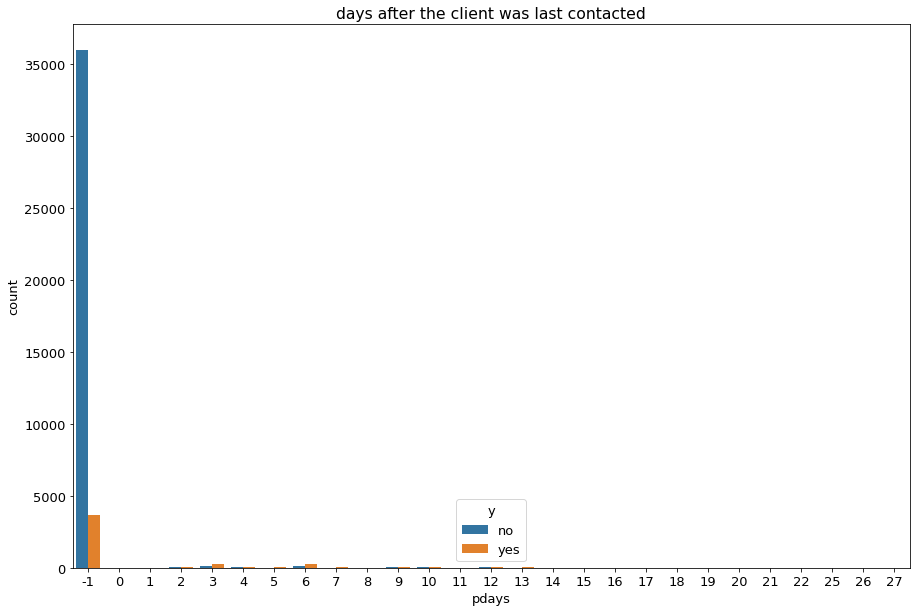

In [ ]:
#Pdays, number of days that passed by after the client was last contacted from a previous campaign
#when there aren't previous contacts value set at 999
#it can create confusione for us and our model so we'll replace 999 with -1
bank['pdays'] = bank['pdays'].replace(999, -1)
plt.figure(figsize=(15,10))
sns.countplot(x="pdays", hue="y", data=bank)
plt.title("days after the client was last contacted")
plt.savefig("pdays.pdf", dpi=1200)
plt.show()
#almost every record of dataset has -1

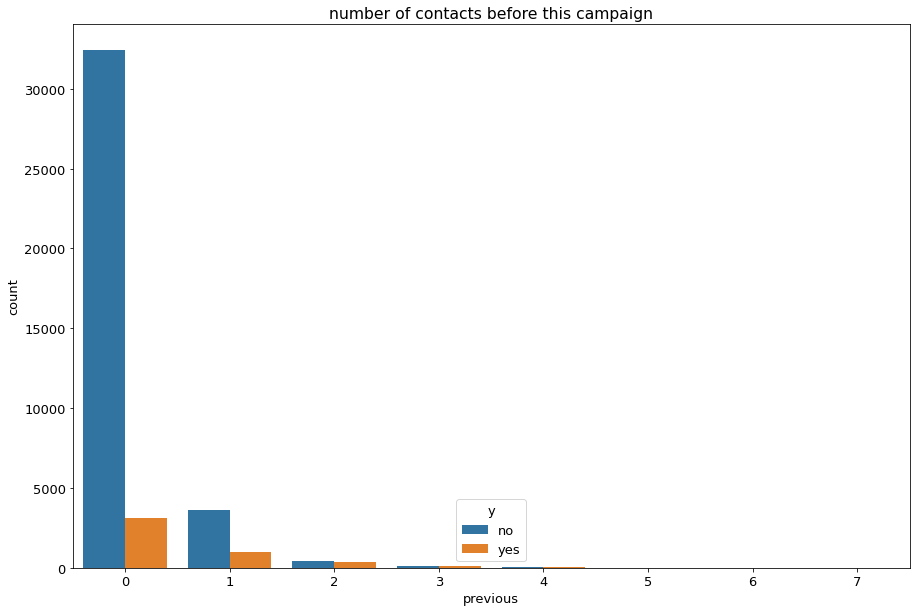

In [ ]:
#previous: number of contacts performed before this campaign and for the client

plt.figure(figsize=(15,10))
sns.countplot(x="previous", hue="y", data=bank)
plt.title("number of contacts before this campaign")
plt.savefig("pcontacts.pdf", dpi=1200)
plt.show()

#### Social economic context attributes

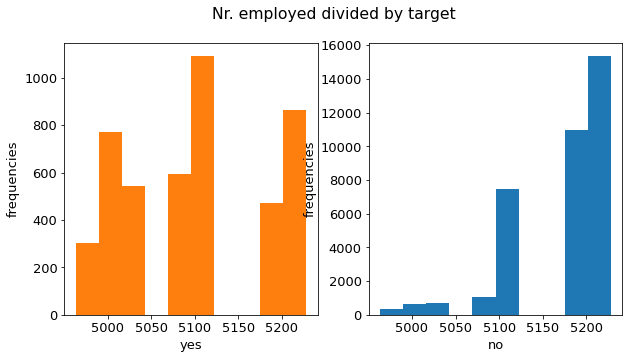

In [ ]:
#number of employees
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(bank[bank["y"]=="yes"]["nr.employed"], bins=10, color="tab:orange")
ax2.hist(bank[bank["y"]=="no"]["nr.employed"], bins=10, color="tab:blue")
ax1.set_xlabel("yes")
ax2.set_xlabel("no")
ax1.set_ylabel("frequencies")
ax2.set_ylabel("frequencies")
#ax1.set_xlim(-1,)
#ax2.set_xlim(-1,)
plt.suptitle("Nr. employed divided by target")
plt.savefig("employees.pdf", dpi=1200)
plt.show()

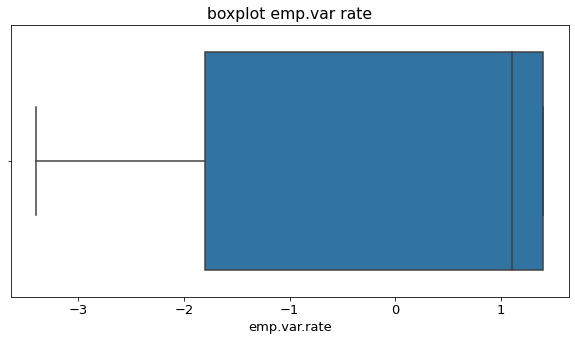

In [ ]:
#emp.var rate
#boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x="emp.var.rate", hue="y", data=bank)
plt.title("boxplot emp.var rate")
plt.savefig("emp.pdf", dpi=1200)
plt.show()

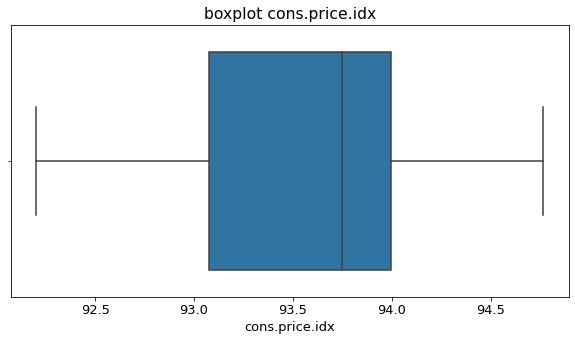

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="cons.price.idx", hue="y", data=bank)
plt.title("boxplot cons.price.idx")
plt.savefig("cons_price.pdf", dpi=1200)
plt.show()

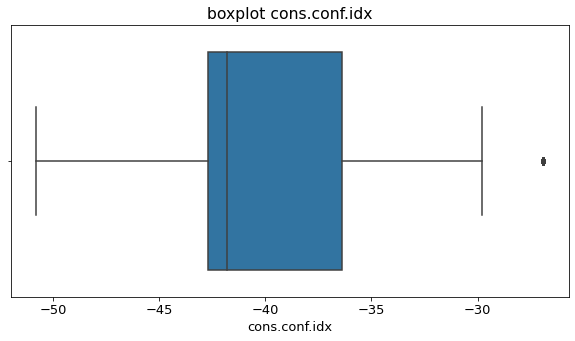

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="cons.conf.idx", hue="y", data=bank)
plt.title("boxplot cons.conf.idx")
plt.savefig("cons_conf.pdf", dpi=1200)
plt.show()

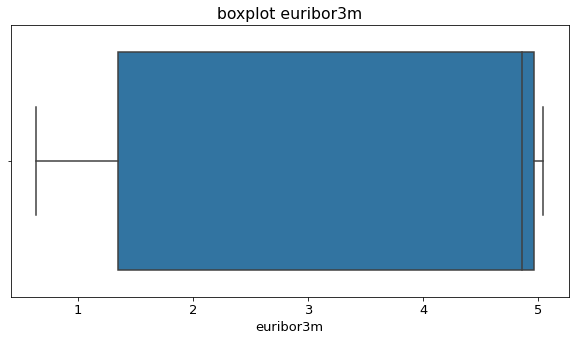

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="euribor3m", hue="y", data=bank)
plt.title("boxplot euribor3m")
plt.savefig("euribr3m.pdf", dpi=1200)
plt.show()


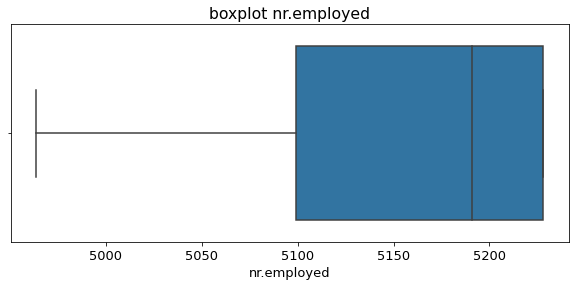

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x="nr.employed", hue="y", data=bank)
plt.title("boxplot nr.employed")
plt.savefig("employed.pdf", dpi=1200)
plt.show()

### data pre processing

#### removing features

In [ ]:
#duration as the creator of dataset said " this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
#Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
#Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#default: without  the unknown value we remain with 3 value equal to yes and the others all to no, so it's useless keep this variable
bank = bank.drop(columns=["duration", "default", "housing", "day_of_week"])

#### Removing outliers


In [ ]:
#removing all the rows in which there are unknwon values in the dataset
print("before the removal of unknown values bank has ", bank.shape[0])
bank = bank.replace('unknown', np.nan)
bank = bank.dropna().reset_index(drop=True)
print("after the removal of unknown values bank has ", bank.shape[0])

before the removal of unknown values bank has  41188
after the removal of unknown values bank has  38245


In [ ]:
#boxplot of age show us lot of outliers, we can remove them
print("before the removal of outliers values bank has ", bank.shape[0])

bank = bank.drop(bank[bank["y"]=="yes"][bank["age"]>upperBoundOutliersYes].index).reset_index(drop=True)
bank = bank.drop(bank[bank["y"]=="no"][bank["age"]>upperBoundOutliersNo].index).reset_index(drop=True)

print("after the removal of outliers values bank has ", bank.shape[0])

before the removal of outliers values bank has  38245
after the removal of outliers values bank has  37946


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


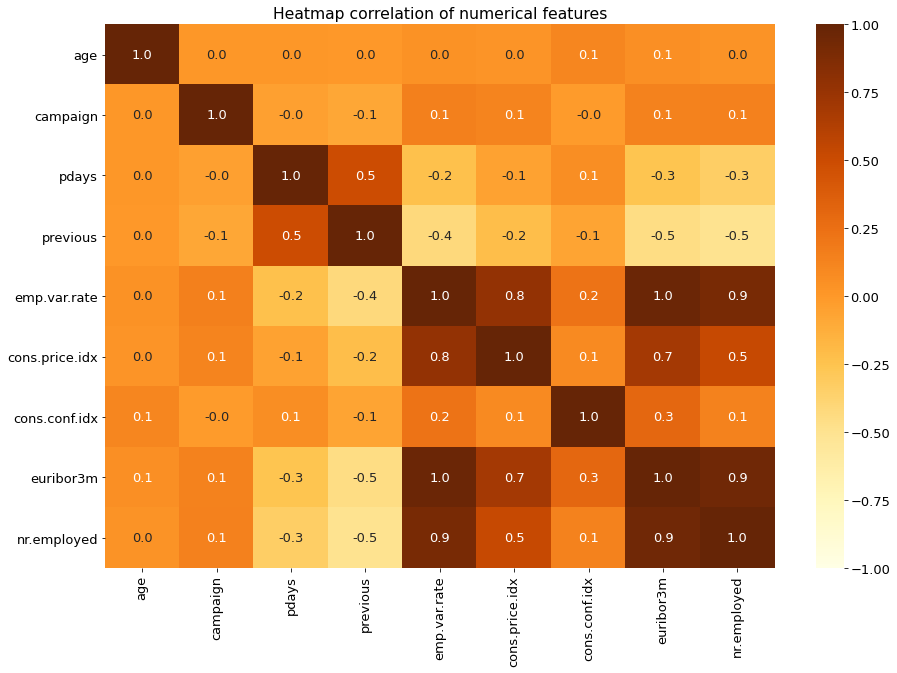

In [ ]:

# Generate correlation matrix heat map to check which feature has greatest influence on the output
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(bank.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'YlOrBr')
plt.title("Heatmap correlation of numerical features")
plt.savefig("heatmap_numerical.pdf", dpi=1200)
plt.show()

In [ ]:
bank[["emp.var.rate", "cons.price.idx","euribor3m", "nr.employed"]].corr()
#Positive high correlation between:
#'emp.var.rate' and 'nr.employed'
# 'emp.var.rate' and 'euribor3m'
# 'euribor3m' and 'nr.employed'
#Euribor is the acronym for the Euro Interbank Offered Rate. This is the interest rate at which credit institutions 
#lend money to each other, which is often referred to as “the price of money”. With this we can say that 
#'emp.var.rate' and 'nr.employed' are positively correlated with euribor. So we will drop 'emp.var.rate' 
#and 'nr.employed' as 'euribor' also give us the price of money in current market.

,emp.var.rate,cons.price.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.776394,0.972774,0.909076
cons.price.idx,0.776394,1.000000,0.692904,0.529455
euribor3m,0.972774,0.692904,1.000000,0.945467
nr.employed,0.909076,0.529455,0.945467,1.000000


In [ ]:
bank = bank.drop(columns=["emp.var.rate", "nr.employed"])

#### Categorical attributes

In [ ]:
#loan can be transformed in boolean 
bank["loan"] = (bank["loan"]=="yes")*1



job = pd.get_dummies(bank.job, drop_first=True)
marital = pd.get_dummies(bank.marital, drop_first=True)
education = pd.get_dummies(bank.education, drop_first=True)
contact = pd.get_dummies(bank.contact, drop_first=True)
month = pd.get_dummies(bank.month, drop_first=True)
poutcome = pd.get_dummies(bank.poutcome, drop_first=True)

In [ ]:
bank = pd.concat([bank, job, marital, education, contact, month, poutcome], axis=1)
bank = bank.drop(columns=["job","marital", "education", "contact", "month", "poutcome"])

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37946 entries, 0 to 37945
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  37946 non-null  int64  
 1   loan                 37946 non-null  int64  
 2   campaign             37946 non-null  int64  
 3   pdays                37946 non-null  int64  
 4   previous             37946 non-null  int64  
 5   cons.price.idx       37946 non-null  float64
 6   cons.conf.idx        37946 non-null  float64
 7   euribor3m            37946 non-null  float64
 8   y                    37946 non-null  object 
 9   blue-collar          37946 non-null  uint8  
 10  entrepreneur         37946 non-null  uint8  
 11  housemaid            37946 non-null  uint8  
 12  management           37946 non-null  uint8  
 13  retired              37946 non-null  uint8  
 14  self-employed        37946 non-null  uint8  
 15  services             37946 non-null 

#### heatmap correlation 

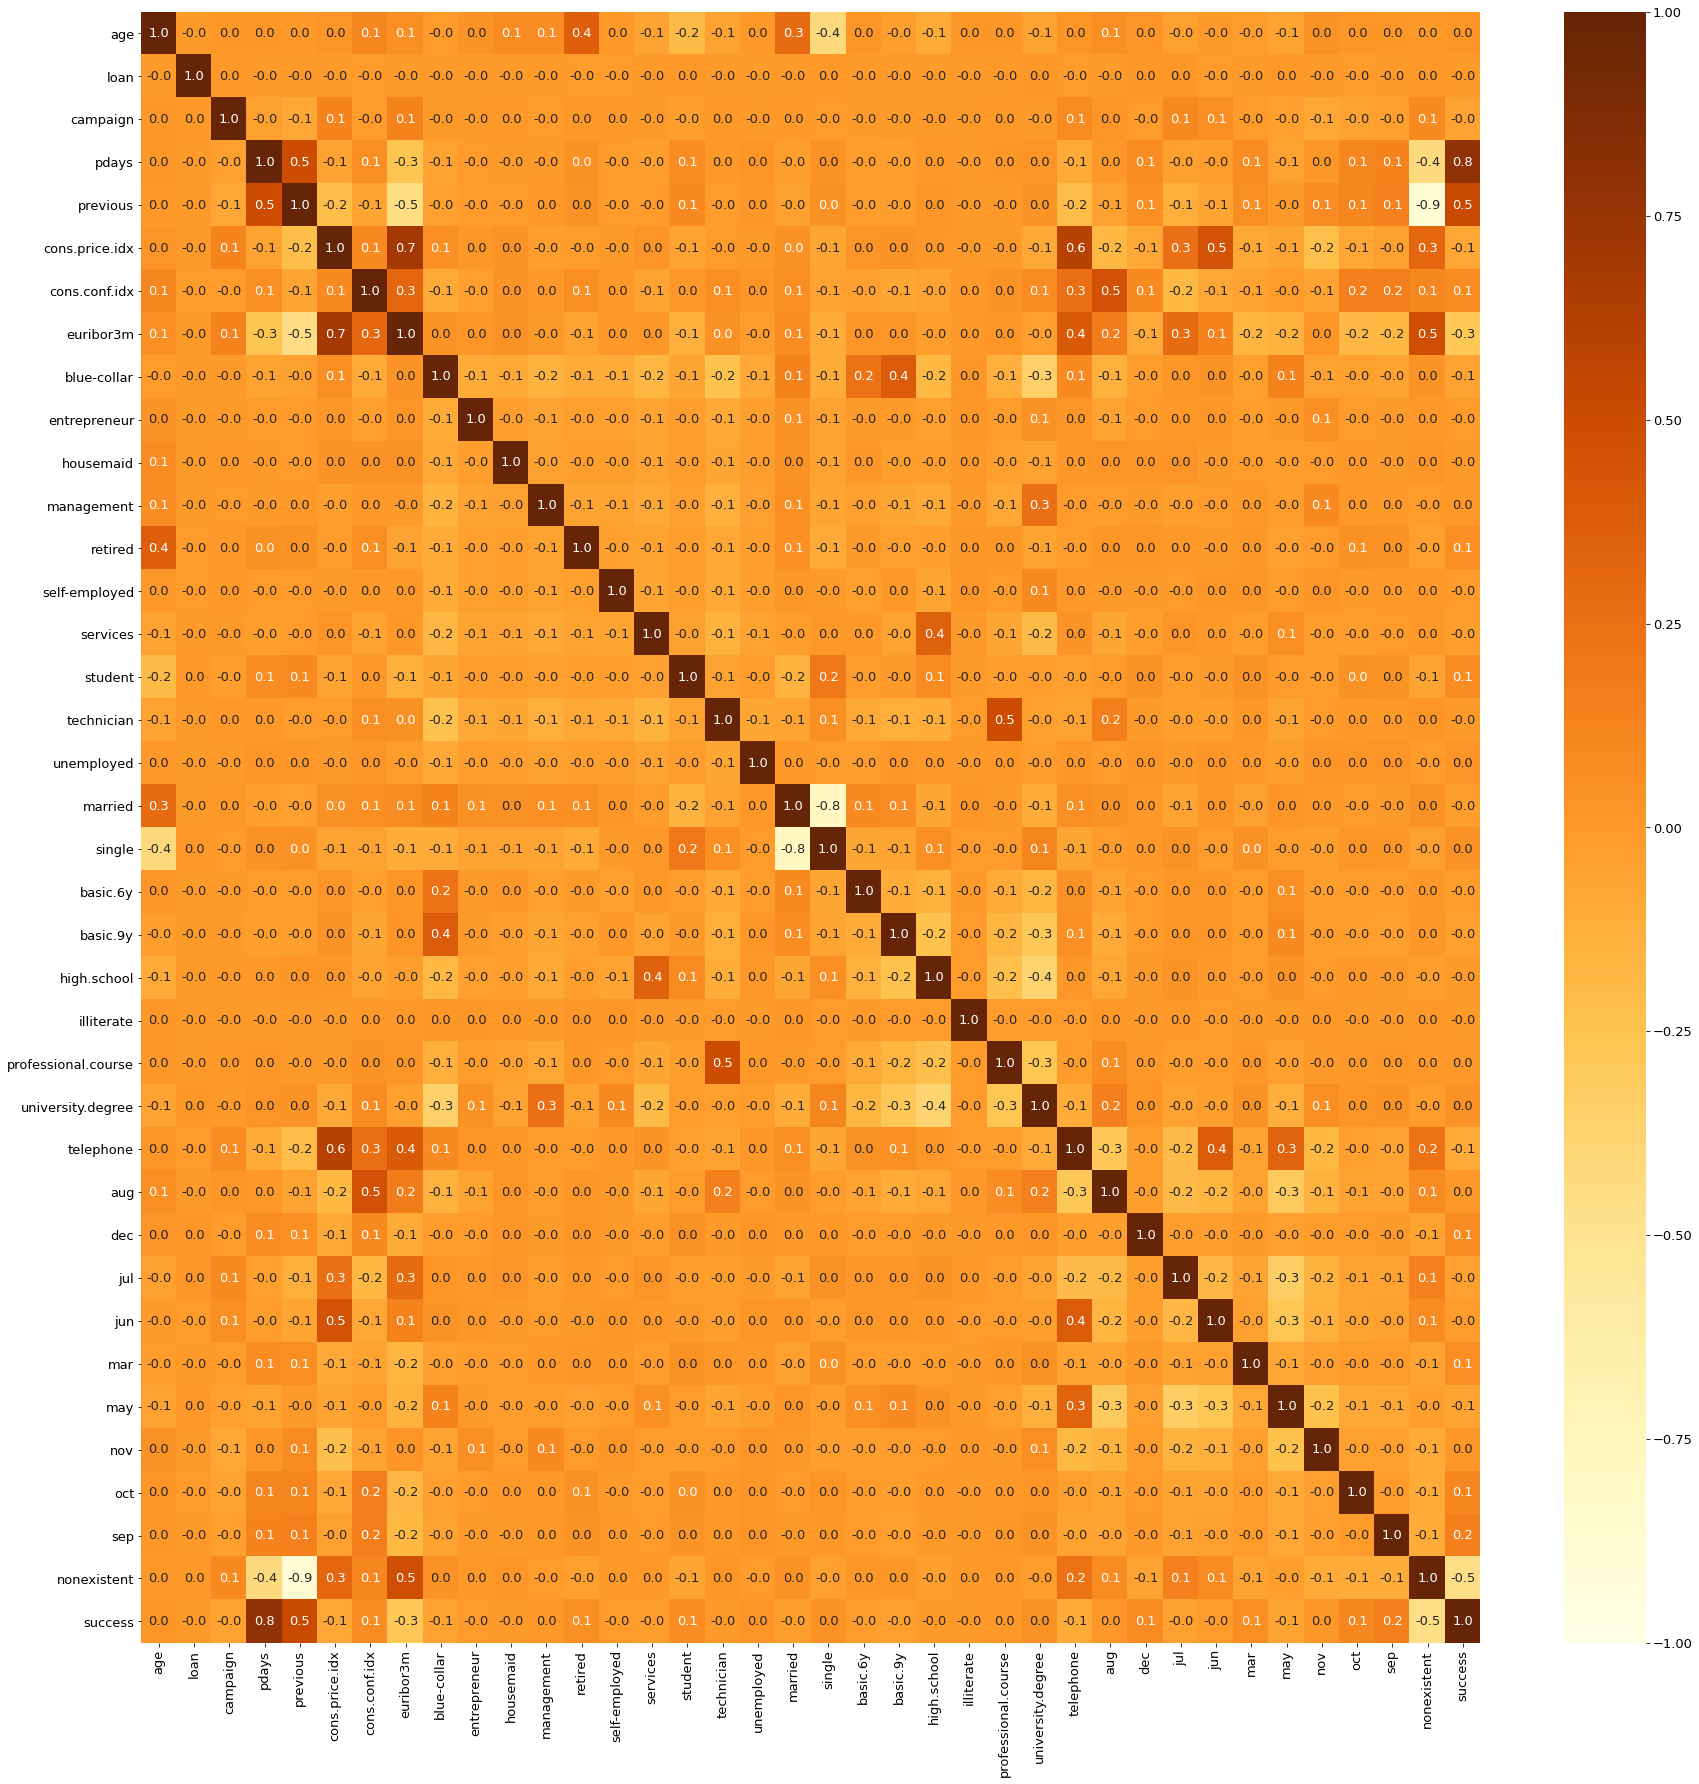

In [ ]:
# Generate correlation matrix heat map to check which feature has greatest influence on the output 
#to do this I need to encode my output target as 0/1
fig, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(bank.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'YlOrBr')

In [ ]:
bank = bank.drop(columns=["nonexistent", "pdays", "single"])

In [ ]:
#bank = bank.drop(columns=["basic.6y", "basic.9y", "high.school", "illiterate", "professional.course"])

#### PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#standardize our numerical data
numerical_bank = bank[["age", "campaign", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m"]]
scaler = StandardScaler()

numerical_bank =pd.DataFrame(scaler.fit_transform(numerical_bank), columns=numerical_bank.columns)

pca = PCA(n_components=6, svd_solver = 'auto')
Principal_components=pca.fit_transform(numerical_bank)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
print(pca_df)

           PC 1      PC 2      PC 3      PC 4      PC 5      PC 6
0     -1.274387 -1.720917  0.063963 -0.705474  0.186158  0.180527
1     -1.282317 -1.790854  0.113979 -0.761023  0.188462  0.181186
2     -1.123718 -0.392131 -0.886352  0.349951  0.142376  0.168008
3     -1.147508 -0.601939 -0.736302  0.183305  0.149289  0.169984
4     -1.274387 -1.720917  0.063963 -0.705474  0.186158  0.180527
...         ...       ...       ...       ...       ...       ...
37941  1.332142  1.879697 -0.278973 -0.666374  2.895606  1.386576
37942  0.119825 -0.797192  1.584010 -3.854011  1.428905  1.954134
37943  0.333935  1.091084  0.233563 -2.354196  1.366688  1.936343
37944  0.190508  0.509529  1.035957 -2.779172  1.329488  1.946863
37945  0.349795  1.230956  0.133530 -2.243098  1.362080  1.935026

[37946 rows x 6 columns]


In [ ]:
for_visual = pd.concat([pca_df, bank['y']], axis = 1)
print(for_visual)

           PC 1      PC 2      PC 3      PC 4      PC 5      PC 6    y
0     -1.274387 -1.720917  0.063963 -0.705474  0.186158  0.180527   no
1     -1.282317 -1.790854  0.113979 -0.761023  0.188462  0.181186   no
2     -1.123718 -0.392131 -0.886352  0.349951  0.142376  0.168008   no
3     -1.147508 -0.601939 -0.736302  0.183305  0.149289  0.169984   no
4     -1.274387 -1.720917  0.063963 -0.705474  0.186158  0.180527   no
...         ...       ...       ...       ...       ...       ...  ...
37941  1.332142  1.879697 -0.278973 -0.666374  2.895606  1.386576   no
37942  0.119825 -0.797192  1.584010 -3.854011  1.428905  1.954134  yes
37943  0.333935  1.091084  0.233563 -2.354196  1.366688  1.936343   no
37944  0.190508  0.509529  1.035957 -2.779172  1.329488  1.946863   no
37945  0.349795  1.230956  0.133530 -2.243098  1.362080  1.935026  yes

[37946 rows x 7 columns]


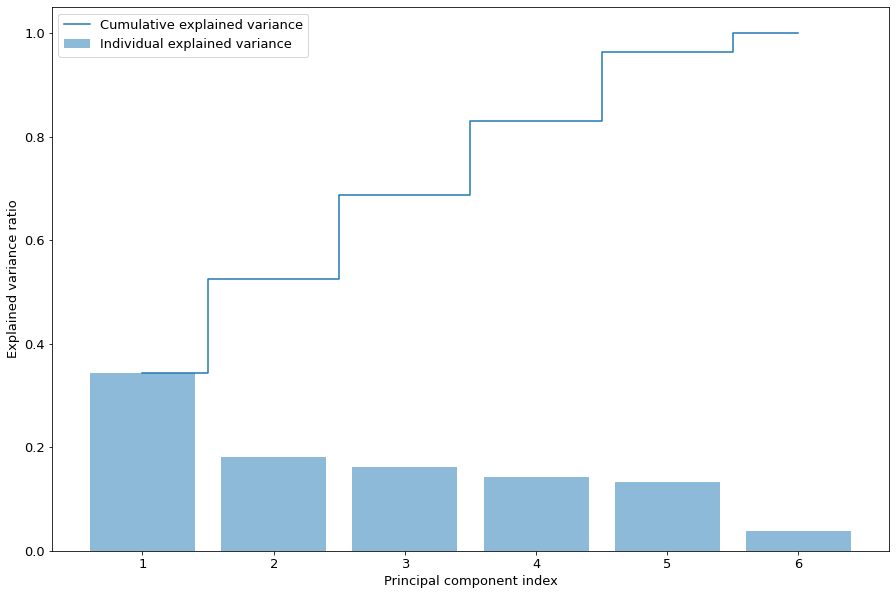

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#fig, ax = plt.subplots(1,1,1,figsize=(15,10))
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1)
ax.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
ax.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.savefig("pca.pdf", dpi=1200)
#plt.show()

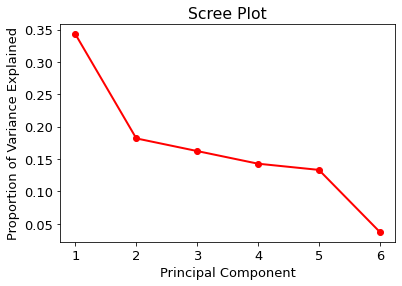

In [ ]:
fig, ax = plt.subplots()
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
fig.savefig('/content/drive/MyDrive/tesina_MML/destination_path.eps', format='eps', dpi=1200)

In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.3427847  0.18181749 0.16225647 0.14271337 0.13313715 0.03729082]
Cumulative Prop. Variance Explained:  [0.3427847  0.52460219 0.68685866 0.82957202 0.96270918 1.        ]


### Splitting and Model

In [ ]:
bank

,age,loan,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,telephone,aug,dec,jul,jun,mar,may,nov,oct,sep,success
0,56,0,1,0,93.994,-36.4,4.857,no,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,57,0,1,0,93.994,-36.4,4.857,no,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,37,0,1,0,93.994,-36.4,4.857,no,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,40,0,1,0,93.994,-36.4,4.857,no,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,56,1,1,0,93.994,-36.4,4.857,no,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,29,0,1,1,94.767,-50.8,1.028,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
37942,73,0,1,0,94.767,-50.8,1.028,yes,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
37943,46,0,1,0,94.767,-50.8,1.028,no,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
37944,56,0,2,0,94.767,-50.8,1.028,no,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


Since the dataset is very unbalanced, in order to train our model I need to apply an oversampling technique, SMOTE

#### split train / test equally 

In [ ]:
from sklearn.model_selection import train_test_split

bank["y"] = (bank["y"]=="yes")*1

#dividing in 70% training and 30% test
#I need to divide it equally, taking 70% from positive and 70% from negative

bank_yes = bank[bank["y"]==1]
y_bank_yes = bank_yes["y"]
bank_yes = bank_yes.drop(columns=["y"])

bank_no = bank[bank["y"]==0]
y_bank_no = bank_no["y"]
bank_no = bank_no.drop(columns=["y"])


X_yes_train, X_yes_test, y_yes_train, y_yes_test = train_test_split(bank_yes, y_bank_yes, train_size=0.70, shuffle=True)

X_no_train, X_no_test, y_no_train, y_no_test = train_test_split(bank_no, y_bank_no, train_size=0.70, shuffle=True)
X_train_full = pd.concat([X_yes_train, X_no_train])
y_train_full = pd.concat([y_yes_train, y_no_train])

X_test_final = pd.concat([X_yes_test, X_no_test])#to use only in the final evaluation
y_test_final = pd.concat([y_yes_test, y_no_test])


#### Standardizing train and test split

In [ ]:
#Standardizing train split
from sklearn.preprocessing import StandardScaler

numerical_train = X_train_full[["age", "campaign", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m"]]
scaler = StandardScaler()

numerical_train =pd.DataFrame(scaler.fit_transform(numerical_train), columns=numerical_train.columns, index=numerical_train.index)
X_train_full = X_train_full.drop(columns=["age", "campaign", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m"])
X_train_full = pd.concat([X_train_full, numerical_train], axis=1)

In [ ]:
#Standardizing test split
from sklearn.preprocessing import StandardScaler

numerical_train = X_test_final[["age", "campaign", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m"]]

numerical_train =pd.DataFrame(scaler.transform(numerical_train), columns=numerical_train.columns, index=numerical_train.index)
X_test_final = X_test_final.drop(columns=["age", "campaign", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m"])
X_test_final = pd.concat([X_test_final, numerical_train], axis=1)

#### Stratified K-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold,ParameterGrid
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score,accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import json

y = y_train_full
X = X_train_full

kf = StratifiedKFold(n_splits=5, shuffle=True)

logRegression_acc = {}
logRegression_recall = {}

randForest_acc = {}
randForest_recall = {}

tree_acc = {}
tree_recall = {}


svm_acc = {}
svm_recall = {}

for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    print(f'For fold {fold}:')
    
    X_train = X.iloc[train_index,:]
    y_train = y.iloc[train_index] 

    X_test = X.iloc[test_index,:]
    y_test = y.iloc[test_index] 

    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)

    hyperparameters_reg = {
      "penalty": ["l2"],
      "C": [1, 10, 100],
      "max_iter": [500,1000]
    }

    for config in ParameterGrid(hyperparameters_reg):
      print(f"Current training: {config}")
      logReg = LogisticRegression(**config)
      logReg.fit(X_train_oversampled, y_train_oversampled)
      print(len(X_train_oversampled))
      y_pred_1 = logReg.predict(X_test)
      if fold==1:
        logRegression_acc[json.dumps(config)] = [accuracy_score(y_test, y_pred_1)]
        logRegression_recall[json.dumps(config)] = [recall_score(y_test, y_pred_1, pos_label=1)]
      else:
        logRegression_acc[json.dumps(config)] += [accuracy_score(y_test, y_pred_1)]
        logRegression_recall[json.dumps(config)] += [recall_score(y_test, y_pred_1, pos_label=1)]

    hyperParameters_tree = {
        "max_features" : ["sqrt"],
        "max_depth" : [None, 15],
        "criterion" : ["gini", "entropy"]
    }

    for config in ParameterGrid(hyperParameters_tree):
      print(f"Current training: {config}")
      tree = DecisionTreeClassifier(**config)
      tree.fit(X_train_oversampled, y_train_oversampled)
      y_pred_2 = tree.predict(X_test)
      if fold==1:
        tree_acc[json.dumps(config)] = [accuracy_score(y_test, y_pred_2)]
        tree_recall[json.dumps(config)] = [recall_score(y_test, y_pred_2, pos_label=1)]
      else:
        tree_acc[json.dumps(config)] += [accuracy_score(y_test, y_pred_2)]
        tree_recall[json.dumps(config)] += [recall_score(y_test, y_pred_2, pos_label=1)]


    hyperParameters_forest = {
        "max_features" : ["sqrt"],
        "n_estimators" : [50,100,150],
        "criterion" : ["gini", "entropy"]
    }

    for config in ParameterGrid(hyperParameters_forest):
      print(f"Current training: {config}")
      forest = RandomForestClassifier(**config)
      forest.fit(X_train_oversampled, y_train_oversampled)
      y_pred_3 = forest.predict(X_test)
      if fold==1:
        randForest_acc[json.dumps(config)] = [accuracy_score(y_test, y_pred_3)]
        randForest_recall[json.dumps(config)] = [recall_score(y_test, y_pred_3, pos_label=1)]
      else:
        randForest_acc[json.dumps(config)] += [accuracy_score(y_test, y_pred_3)]
        randForest_recall[json.dumps(config)] += [recall_score(y_test, y_pred_3, pos_label=1)]


     hyperParameters_svm = {
        "gamma" : ["scale", "auto"],
        "kernel" : ["linear", "rbf"]
    }

    for config in ParameterGrid(hyperParameters_svm):
      print(f"Current training: {config}")
      svm = SVC(**config)
      svm.fit(X_train_oversampled, y_train_oversampled)
      y_pred_4 = svm.predict(X_test)
      if fold==1:
        svm_acc[json.dumps(config)] = [accuracy_score(y_test, y_pred_4)]
        svm_recall[(json.dumps(config))] = [recall_score(y_test, y_pred_4, pos_label=1)]
      else: 
        svm_acc[json.dumps(config)] += [accuracy_score(y_test, y_pred_4)]
        svm_recall[(json.dumps(config))] += [recall_score(y_test, y_pred_4, pos_label=1)]

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


For fold 1:
Current training: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}
37810
Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
37810
Current training: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
37810
Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
37810
Current training: {'C': 100, 'max_iter': 500, 'penalty': 'l2'}
37810
Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
37810
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Current training: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}
37810
Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
37810
Current training: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
37810
Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
37810
Current training: {'C': 100, 'max_iter': 500, 'penalty': 'l2'}
37810
Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
37810
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}
C

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Current training: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'C': 100, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}
C

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Current training: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'C': 100, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}
C

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Current training: {'C': 1, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'C': 100, 'max_iter': 500, 'penalty': 'l2'}
37812
Current training: {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
37812
Current training: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt'}
Current training: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
Current training: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150}
C

In [ ]:
mean_logRegression_acc = {k : (np.array(v)).mean() for k,v in logRegression_acc.items()}
mean_logRegression_recall = {k : (np.array(v)).mean() for k,v in logRegression_recall.items()}

mean_tree_acc = {k : (np.array(v)).mean() for k,v in tree_acc.items()}
mean_tree_recall = {k : (np.array(v)).mean() for k,v in tree_recall.items()}

mean_randForest_acc = {k : (np.array(v)).mean() for k,v in randForest_acc.items()}
mean_randForest_recall = {k : (np.array(v)).mean() for k,v in randForest_recall.items()}

mean_svm_acc = {k : (np.array(v)).mean() for k,v in svm_acc.items()}
mean_svm_recall = {k : (np.array(v)).mean() for k,v in svm_recall.items()}

In [ ]:
print(mean_logRegression_acc)
print(mean_logRegression_recall)

print(mean_tree_acc)
print(mean_tree_recall)

print(mean_randForest_acc)
print(mean_randForest_recall)


print(mean_svm_acc)
print(mean_svm_recall)

{'{"C": 1, "max_iter": 500, "penalty": "l2"}': 0.8204580603611509, '{"C": 1, "max_iter": 1000, "penalty": "l2"}': 0.8204580603611509, '{"C": 10, "max_iter": 500, "penalty": "l2"}': 0.8204580461881404, '{"C": 10, "max_iter": 1000, "penalty": "l2"}': 0.8204580461881404, '{"C": 100, "max_iter": 500, "penalty": "l2"}': 0.8204580461881404, '{"C": 100, "max_iter": 1000, "penalty": "l2"}': 0.8204580461881404}
{'{"C": 1, "max_iter": 500, "penalty": "l2"}': 0.6078498293515358, '{"C": 1, "max_iter": 1000, "penalty": "l2"}': 0.6078498293515358, '{"C": 10, "max_iter": 500, "penalty": "l2"}': 0.6081911262798634, '{"C": 10, "max_iter": 1000, "penalty": "l2"}': 0.6081911262798634, '{"C": 100, "max_iter": 500, "penalty": "l2"}': 0.6081911262798634, '{"C": 100, "max_iter": 1000, "penalty": "l2"}': 0.6081911262798634}
{'{"criterion": "gini", "max_depth": null, "max_features": "sqrt"}': 0.8383026530174906, '{"criterion": "gini", "max_depth": 15, "max_features": "sqrt"}': 0.8446655835652038, '{"criterion"

In [ ]:
top_lg_acc = max(mean_logRegression_acc, key=mean_logRegression_acc.get)
top_lg_recall = max(mean_logRegression_recall, key=mean_logRegression_recall.get)

top_tree_acc = max(mean_tree_acc, key=mean_tree_acc.get)
top_tree_recall = max(mean_tree_recall, key=mean_tree_recall.get)

top_forest_acc = max(mean_randForest_acc, key=mean_randForest_acc.get)
top_forest_recall = max(mean_randForest_recall, key=mean_randForest_recall.get)
#top_svm_acc = max(mean_svm_acc, key=mean_svm_acc.get)#top_svm_recall = max(mean_svm_recall, key=mean_svm_recall.get)#top_svm_f1 = max(mean_svm_f1, key=mean_svm_f1.get)

In [ ]:
print(top_lg_acc)
print(top_lg_recall)

print(top_tree_acc)
print(top_tree_recall)

print(top_forest_acc)
print(top_forest_recall)

print(top_svm_acc)
print(top_svm_recall)

{"C": 10, "max_iter": 500, "penalty": "l2"}
{"C": 10, "max_iter": 500, "penalty": "l2"}
{"C": 10, "max_iter": 500, "penalty": "l2"}
{"criterion": "entropy", "max_depth": 15, "max_features": "sqrt"}
{"criterion": "gini", "max_depth": 15, "max_features": "sqrt"}
{"criterion": "entropy", "max_depth": 15, "max_features": "sqrt"}
{"criterion": "entropy", "max_features": "sqrt", "n_estimators": 100}
{"criterion": "entropy", "max_features": "sqrt", "n_estimators": 100}
{"criterion": "entropy", "max_features": "sqrt", "n_estimators": 100}


#### Final Evaluation

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold,ParameterGrid
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score,accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import json
# use X_train_full that is the full training dataset
sm = SMOTE()
X_train_oversampled_full, y_train_oversampled_full = sm.fit_sample(X_train_full, y_train_full)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
logReg = LogisticRegression(C=100, max_iter=500, penalty="l2")
logReg.fit(X_train_oversampled_full, y_train_oversampled_full)
#logReg.fit(X_train_full, y_train_full)
y_pred_lg_test = logReg.predict(X_test_final)
print("accuracy:",accuracy_score(y_test_final, y_pred_lg_test))
print("recall:",recall_score(y_test_final, y_pred_lg_test, pos_label=1))
print("f1score:",f1_score(y_test_final, y_pred_lg_test, pos_label=1))

accuracy: 0.8251054111033029
recall: 0.6186305732484076
f1score: 0.43836389280677013


In [ ]:
tree_final = DecisionTreeClassifier(criterion="entropy", max_depth=15, max_features="sqrt", class_weight="balanced")
tree_final.fit(X_train_oversampled_full, y_train_oversampled_full)
y_tree_final = tree_final.predict(X_test_final)
print("accuracy:",accuracy_score(y_test_final, y_tree_final))
print("recall:",recall_score(y_test_final, y_tree_final, pos_label=1))
print("f1score:",f1_score(y_test_final, y_tree_final, pos_label=1))


accuracy: 0.8673576950105412
recall: 0.4394904458598726
f1score: 0.4223412394797246


In [ ]:
forest = RandomForestClassifier(criterion="entropy", max_depth=15, max_features="sqrt", class_weight="balanced")
forest.fit(X_train_oversampled_full, y_train_oversampled_full)
#forest.fit(X_train_full, y_train_full)
y_pred_forest = forest.predict(X_test_final)
print("accuracy:",accuracy_score(y_test_final, y_pred_forest))
print("recall:",recall_score(y_test_final, y_pred_forest, pos_label=1))
print("f1score:",f1_score(y_test_final, y_pred_forest, pos_label=1))

accuracy: 0.8902846099789178
recall: 0.5087579617834395
f1score: 0.5057380292837357


In [ ]:
svm_test = SVC(gamma="scale", kernel="rbf")
svm_test.fit(X_train_oversampled_full, y_train_oversampled_full)
y_pred_svm_test = svm_test.predict(X_test_final)
print("accuracy:",accuracy_score(y_test_final, y_pred_svm_test))
print("recall:",recall_score(y_test_final, y_pred_svm_test, pos_label=1))
print("f1score:",f1_score(y_test_final, y_pred_svm_test, pos_label=1))

accuracy: 0.8548840477863668
recall: 0.5820063694267515
f1score: 0.46949261400128456


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig_2, ax = plt.subplots(1, 2, figsize=(15 , 10))
ax[0].bar(['SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree'], [0.8388088545326774, 0.8237908496732026, 0.7387363834422658, 0.6961220043572984], 
          color = color)
ax[0].set_ylim([0, 1])
ax[0].set_xlabel("Models")
ax[0].set_ylabel("Accuracy")
ax[1].bar(['Random Forest', 'Logistic Regression', 'Decision Tree', 'SVM'], [0.6588419405320813, 0.6314553990610329, 0.5790297339593115, 0.5780254777070064], 
          color = ['#be4d25', '#9925be', '#49be25','#2596be'])
ax[1].set_ylim([0, 1])
ax[1].set_xlabel("Models")
ax[1].set_ylabel("Recall")


color = ('#2596be', '#9925be', '#be4d25', '#49be25')
labels = ['SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree']
# map names to colors
cmap = dict(zip(labels, color))

# create the rectangles for the legend
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
ax[0].legend(labels=labels, handles=patches, loc='upper left')
ax[1].legend(labels=labels, handles=patches, loc='upper left')

plt.savefig("conclusion.pdf", dpi=1200)
plt.show()